In [41]:
import pandas as pd 
import numpy as np

import scipy.stats as stats
from scipy.special import erf

import matplotlib.pyplot as plt
import math

In [2]:
N = 19
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]
col

'Time_on_Gaming'

# Анализ колонки Time_on_Gaming

## Общий обзор

В данном исследовании был проведен всесторонний анализ колонки `Time_on_Gaming`, которая представляет собой время, проводимое подростками за играми (в часах). Выборка содержит **3000 наблюдений** учащихся различных классов средней школы.

### Ключевые характеристики данных:
- **Минимальное значение**: 0 часов
- **Максимальное значение**: ~4 часа
- **Тип данных**: Непрерывная количественная переменная
- **Единица измерения**: Часы в день

In [3]:
df = pd.read_csv('teen_phone_addiction_dataset.csv')
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


# Stats

In [44]:
def get_stats(data):

    mean = np.mean(data)
    var = np.var(data)

    mode_values = data.mode()
    mode = mode_values.iloc[0]
    
    median = np.median(data)
    q25 = data.quantile(0.25)
    q50 = data.quantile(0.50)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    excess = data.kurtosis()
    skew = data.skew()

    print(f"""Статистики:
          
        Среднее: {mean:.2f}
        Дисперсия: {var:.2f}
        Мода: {mode:.2f}
        Медиана: {median:.2f}
        Квантиль 0.25: {q25:.2f}
        Квантиль 0.5: {q50:.2f}
        Квантиль 0.75: {q75:.2f}
        Эксцесс: {excess:.2f}
        Ассиметрия: {skew:.2f}
        IQR: {iqr:.2f}

    """)

    num_bins = int(np.log2(data.size) + 1)
        
    figure, (hist_axis, ecdf_axis) = plt.subplots(1, 2, figsize=(16, 6))

    hist_axis.hist(data, bins=num_bins, alpha=0.8, color='lightsteelblue', 
                edgecolor='navy', density=True)
    hist_axis.set_title(f'Гистограмма признака: {data.name}')
    hist_axis.set_xlabel('Величина признака')
    hist_axis.set_ylabel('Частота')
    hist_axis.grid(True, alpha=0.4, linestyle=':')

    hist_axis.axvline(data.mean(), color='crimson', linestyle='-', 
                    label=f'Среднее: {data.mean():.2f}', linewidth=2)
    hist_axis.axvline(data.median(), color='forestgreen', linestyle='-', 
                    label=f'Медиана: {data.median():.2f}', linewidth=2)
    hist_axis.legend(framealpha=0.9)

    sorted_values = np.sort(data.dropna())
    cumulative_prob = np.linspace(0, 1, len(sorted_values))

    ecdf_axis.plot(sorted_values, cumulative_prob, color='darkblue', 
                linewidth=2.5, drawstyle='steps-post')
    ecdf_axis.set_title(f'Эмпирическая функция распределения признака: {data.name}')
    ecdf_axis.set_xlabel('Величина признака')
    ecdf_axis.set_ylabel('Накопленная вероятность')
    ecdf_axis.grid(True, alpha=0.4, linestyle=':')
    ecdf_axis.set_ylim(-0.02, 1.02)

    ecdf_axis.axvline(q25, color='darkorange', linestyle='--', 
                    label=f'25-й перцентиль: {q25:.2f}', alpha=0.8)
    ecdf_axis.axvline(q50, color='limegreen', linestyle='--', 
                    label=f'Медиана: {q50:.2f}', alpha=0.8)
    ecdf_axis.axvline(q75, color='firebrick', linestyle='--', 
                    label=f'75-й перцентиль: {q75:.2f}', alpha=0.8)
    ecdf_axis.legend(framealpha=0.9)

    plt.tight_layout(pad=2.0)

ModeResult(mode=np.float64(0.0), count=np.int64(205))
Статистики:

        Среднее: 1.53
        Дисперсия: 0.87
        Мода: 0.00
        Медиана: 1.50
        Квантиль 0.25: 0.80
        Квантиль 0.5: 1.50
        Квантиль 0.75: 2.20
        Эксцесс: -0.50
        Ассиметрия: 0.26
        IQR: 1.40

    


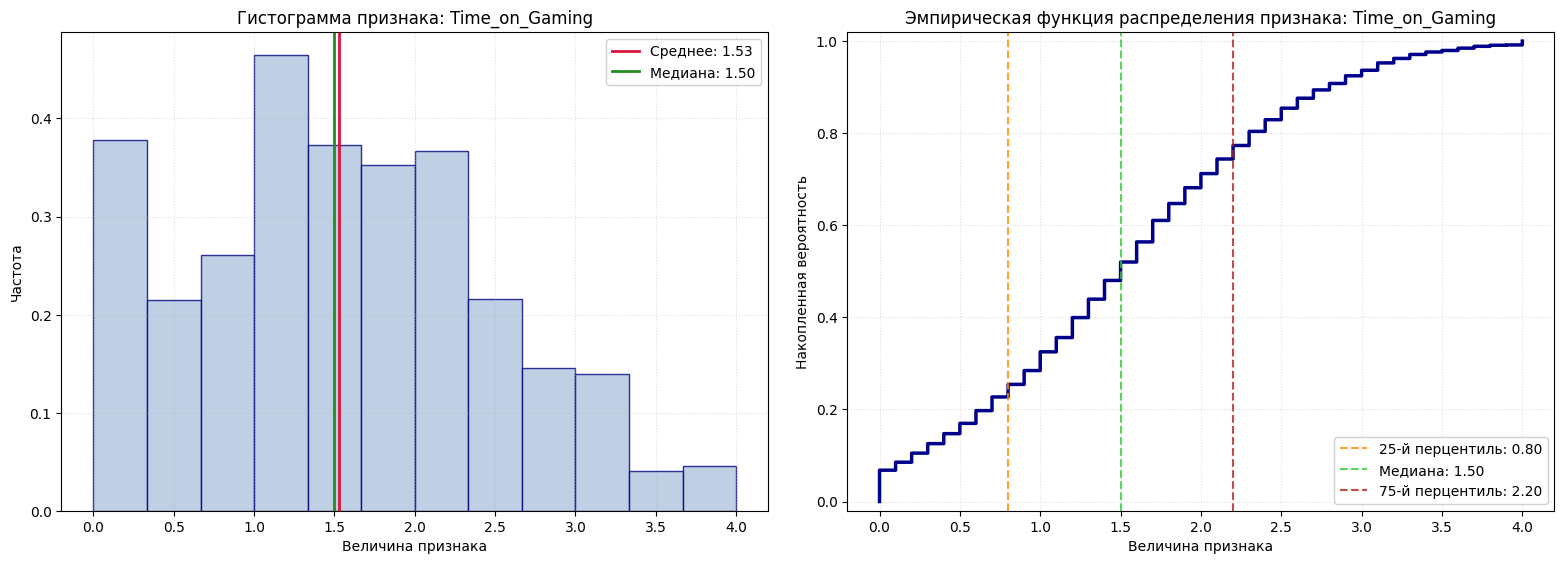

In [43]:
get_stats(df[col])

## Описательные статистики

### Центральные тенденции
- **Среднее арифметическое**: 1,53 часа
- **Медиана**: 1,50 часа  
- **Мода**: 0,00 часов

### Изменчивость данных
- **Дисперсия**: 0,87
- **Стандартное отклонение**: ~0,93 часа
- **Интерквартильный размах (IQR)**: 1,40 часа
- **25-й процентиль**: 0,80 часа
- **75-й процентиль**: 2,20 часа

### Ключевые выводы по описательным статистикам:

1. **Близость средних значений**: Среднее (1,53) и медиана (1,50) практически совпадают, что указывает на симметричность распределения в центральной части.

2. **Нулевая мода**: Мода равна 0, что означает, что наиболее часто встречающееся значение - это отсутствие времени на игры. Это говорит о том, что значительная часть подростков не играет в игры вообще.

3. **Умеренная изменчивость**: Стандартное отклонение составляет около 0,93 часа, что показывает умеренный разброс данных вокруг среднего значения.

4. **Распределение квартилей**: 
   - 25% учащихся играют менее 0,8 часа в день
   - 50% учащихся играют менее 1,5 часа в день
   - 75% учащихся играют менее 2,2 часа в день


# Criteria

In [6]:
def normal_cumulative_dist(mu, sigma, x):
    """
    Вычисляет интегральную функцию нормального распределения N(μ, σ²)
    """
    z_score = (x - mu) / sigma
    return 0.5 * (1 + math.erf(z_score / math.sqrt(2)))


def compute_frequency_bins(values, num_bins=None):
    """
    Формирует бины и подсчитывает частоты распределения данных
    Если количество бинов не указано, применяется формула Старджесса
    """
    if num_bins is None:
        num_bins = int(1 + 3.322 * math.log10(len(values)))
    
    min_value = np.min(values)
    max_value = np.max(values)
    
    bin_boundaries = np.linspace(min_value, max_value, num_bins + 1)
    frequencies, _ = np.histogram(values, bins=bin_boundaries)
    
    return frequencies, bin_boundaries


def calculate_expected_normal_frequencies(values, mu, sigma):
    """
    Вычисляет теоретические частоты для нормального распределения
    """
    sample_size = len(values)
    empirical_freq, bin_limits = compute_frequency_bins(values)
    theoretical_freq = []
    
    for i in range(len(bin_limits) - 1):
        lower_bound = bin_limits[i]
        upper_bound = bin_limits[i + 1]
        
        # Вероятность попадания в интервал [lower_bound, upper_bound)
        prob_lower = normal_cumulative_dist(mu, sigma, lower_bound)
        prob_upper = normal_cumulative_dist(mu, sigma, upper_bound)
        interval_probability = prob_upper - prob_lower
        
        theoretical_freq.append(round(sample_size * interval_probability))
    
    return np.array(theoretical_freq), empirical_freq


def compute_chi_square_metric(empirical, theoretical):
    """
    Вычисляет значение статистики χ² для сравнения распределений
    """
    chi_square_value = 0
    
    for i in range(len(empirical)):
        if theoretical[i] > 0:
            deviation = empirical[i] - theoretical[i]
            chi_square_value += (deviation ** 2) / theoretical[i]
    
    return chi_square_value


def assess_normality_chi_square(values, significance=0.05):
    """
    Проверка соответствия распределения нормальному закону с помощью критерия χ²
    """
    print("🔍" * 25)
    print("АНАЛИЗ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ")
    print("📊 Критерий согласия χ² (хи-квадрат)")
    print("🔍" * 25)
    
    n = len(values)
    mu_est = np.mean(values)
    sigma_est = np.std(values, ddof=1)
    
    print(f"📈 Объем выборки: {n} наблюдений")
    print(f"📐 Оценка математического ожидания: μ = {mu_est:.6f}")
    print(f"📏 Оценка стандартного отклонения: σ = {sigma_est:.6f}")
    
    exp_freq, obs_freq = calculate_expected_normal_frequencies(values, mu_est, sigma_est)
    
    # Объединение интервалов для выполнения условий критерия
    min_expected = 5
    merged_observed = []
    merged_expected = []
    
    temp_obs = 0
    temp_exp = 0
    
    for i in range(len(obs_freq)):
        temp_obs += obs_freq[i]
        temp_exp += exp_freq[i]
        
        if temp_exp >= min_expected or i == len(obs_freq) - 1:
            merged_observed.append(temp_obs)
            merged_expected.append(temp_exp)
            temp_obs = 0
            temp_exp = 0
    
    final_obs = np.array(merged_observed)
    final_exp = np.array(merged_expected)
    
    print(f"\n📊 Количество интервалов после объединения: {len(final_obs)}")
    print(f"👀 Наблюдаемые частоты:    {final_obs}")
    print(f"📘 Ожидаемые частоты:      {final_exp.round(1)}")
    
    chi_sq_value = compute_chi_square_metric(final_obs, final_exp)
    
    # Степени свободы: (интервалы - 1) - оцененные параметры
    degrees_freedom = len(final_obs) - 3
    
    print(f"\n📊 Вычисленная статистика χ²: {chi_sq_value:.6f}")
    print(f"🎯 Степени свободы: {degrees_freedom}")
    
    if degrees_freedom <= 0:
        print("⚠️  Недостаточно данных для корректного анализа")
        return None
    
    critical_val = stats.chi2.ppf(1 - significance, degrees_freedom)
    p_val = 1 - stats.chi2.cdf(chi_sq_value, degrees_freedom)
    
    print(f"🔴 Критическое значение (α={significance}): {critical_val:.6f}")
    print(f"📉 P-значение: {p_val:.6f}")
    
    normal_distribution = chi_sq_value <= critical_val
    
    print(f"\n🎯 ЗАКЛЮЧЕНИЕ: ", end="")
    if normal_distribution:
        print("✅ Распределение соответствует нормальному закону")
        print(f"   (χ² = {chi_sq_value:.3f} ≤ {critical_val:.3f}, p = {p_val:.4f})")
    else:
        print("❌ Распределение НЕ соответствует нормальному закону")
        print(f"   (χ² = {chi_sq_value:.3f} > {critical_val:.3f}, p = {p_val:.4f})")
    
    return {
        'chi_square_statistic': chi_sq_value,
        'degrees_of_freedom': degrees_freedom,
        'p_value': p_val,
        'critical_threshold': critical_val,
        'is_normal_distribution': normal_distribution,
        'estimated_mu': mu_est,
        'estimated_sigma': sigma_est
    }

In [7]:
chi2 = assess_normality_chi_square(df[col])

🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍
АНАЛИЗ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ
📊 Критерий согласия χ² (хи-квадрат)
🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍
📈 Объем выборки: 3000 наблюдений
📐 Оценка математического ожидания: μ = 1.525267
📏 Оценка стандартного отклонения: σ = 0.932701

📊 Количество интервалов после объединения: 12
👀 Наблюдаемые частоты:    [378 215 261 465 373 353 367 216 146 139  41  46]
📘 Ожидаемые частоты:      [149 234 324 395 425 403 337 248 161  92  46  21]

📊 Вычисленная статистика χ²: 453.230069
🎯 Степени свободы: 9
🔴 Критическое значение (α=0.05): 16.918978
📉 P-значение: 0.000000

🎯 ЗАКЛЮЧЕНИЕ: ❌ Распределение НЕ соответствует нормальному закону
   (χ² = 453.230 > 16.919, p = 0.0000)


In [8]:
def analyze_distribution_shape(sample_data, significance_level=0.05):
    """
    Анализ формы распределения через показатели асимметрии и эксцесса
    с проверкой соответствия нормальному распределению
    """
    
    processed_data = sample_data.dropna()
    sample_size = len(processed_data)
    
    asymmetry_coef = processed_data.skew()
    excess_coef = processed_data.kurtosis()  # эксцесс относительно нормального распределения
    
    print("🌟" * 35)
    print("АНАЛИЗ ФОРМЫ РАСПРЕДЕЛЕНИЯ ДАННЫХ")
    print("📊 Оценка асимметрии и эксцесса")
    print("🌟" * 35)
    
    print(f"📋 Объем выборки после очистки: {sample_size} наблюдений")
    print(f"📐 Коэффициент асимметрии: {asymmetry_coef:+.6f}")
    print(f"📏 Коэффициент эксцесса: {excess_coef:+.6f}")
    
    # Вычисление стандартных ошибок
    std_error_asymmetry = math.sqrt(6 * sample_size * (sample_size - 1) / 
                                  ((sample_size - 2) * (sample_size + 1) * (sample_size + 3)))
    
    std_error_excess = math.sqrt(24 * sample_size * (sample_size - 1) * (sample_size - 1) /
                               ((sample_size - 3) * (sample_size - 2) * (sample_size + 3) * (sample_size + 5)))
    
    print(f"\n📊 Стандартная ошибка асимметрии: {std_error_asymmetry:.6f}")
    print(f"📊 Стандартная ошибка эксцесса: {std_error_excess:.6f}")
    
    # Вычисление Z-статистик
    z_score_asymmetry = asymmetry_coef / std_error_asymmetry
    z_score_excess = excess_coef / std_error_excess
    
    print(f"📈 Z-статистика асимметрии: {z_score_asymmetry:+.6f}")
    print(f"📈 Z-статистика эксцесса: {z_score_excess:+.6f}")
    
    # Критическое значение Z для двустороннего теста
    z_critical_value = stats.norm.ppf(1 - significance_level/2)
    print(f"🎯 Критическое значение Z (α={significance_level}): ±{z_critical_value:.6f}")
    
    # Проверка статистических гипотез
    asymmetry_normal = abs(z_score_asymmetry) <= z_critical_value
    excess_normal = abs(z_score_excess) <= z_critical_value
    distribution_normal = asymmetry_normal and excess_normal
    
    print(f"\n🔍 РЕЗУЛЬТАТЫ ПРОВЕРКИ:")
    print(f"   Асимметрия: {'✅ В пределах нормы' if asymmetry_normal else '❌ Выходит за пределы'}")
    print(f"   Эксцесс: {'✅ В пределах нормы' if excess_normal else '❌ Выходит за пределы'}")
    print(f"   📝 Общий вывод: {'✅ Распределение соответствует нормальному' if distribution_normal else '❌ Распределение отклоняется от нормального'}")
    
    # Расчет p-значений
    p_value_asymmetry = 2 * (1 - stats.norm.cdf(abs(z_score_asymmetry)))
    p_value_excess = 2 * (1 - stats.norm.cdf(abs(z_score_excess)))
    
    print(f"\n📉 P-ЗНАЧЕНИЯ:")
    print(f"   Асимметрия: {p_value_asymmetry:.6f} {'(> 0.05)' if p_value_asymmetry > 0.05 else '(≤ 0.05)'}")
    print(f"   Эксцесс: {p_value_excess:.6f} {'(> 0.05)' if p_value_excess > 0.05 else '(≤ 0.05)'}")
    
    # Интерпретация показателей
    print(f"\n📚 ИНТЕРПРЕТАЦИЯ ПОКАЗАТЕЛЕЙ:")
    if abs(asymmetry_coef) < 0.5:
        print(f"   • Асимметрия: незначительная ({asymmetry_coef:+.3f})")
    elif abs(asymmetry_coef) < 1.0:
        print(f"   • Асимметрия: умеренная ({asymmetry_coef:+.3f})")
    else:
        print(f"   • Асимметрия: существенная ({asymmetry_coef:+.3f})")
    
    if abs(excess_coef) < 0.5:
        print(f"   • Эксцесс: близок к нормальному ({excess_coef:+.3f})")
    elif abs(excess_coef) < 1.0:
        print(f"   • Эксцесс: умеренное отклонение ({excess_coef:+.3f})")
    else:
        print(f"   • Эксцесс: значительное отклонение ({excess_coef:+.3f})")
    
    return {
        'sample_size': sample_size,
        'skewness_coefficient': asymmetry_coef,
        'kurtosis_coefficient': excess_coef,
        'skewness_std_error': std_error_asymmetry,
        'kurtosis_std_error': std_error_excess,
        'skewness_z_score': z_score_asymmetry,
        'kurtosis_z_score': z_score_excess,
        'skewness_p_value': p_value_asymmetry,
        'kurtosis_p_value': p_value_excess,
        'critical_z_value': z_critical_value,
        'is_skewness_normal': asymmetry_normal,
        'is_kurtosis_normal': excess_normal,
        'is_normal_distribution': distribution_normal,
        'distribution_type': 'normal' if distribution_normal else 'non-normal'
    }

In [9]:
result_sk = analyze_distribution_shape(df[col])

🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟
АНАЛИЗ ФОРМЫ РАСПРЕДЕЛЕНИЯ ДАННЫХ
📊 Оценка асимметрии и эксцесса
🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟
📋 Объем выборки после очистки: 3000 наблюдений
📐 Коэффициент асимметрии: +0.259011
📏 Коэффициент эксцесса: -0.498206

📊 Стандартная ошибка асимметрии: 0.044699
📊 Стандартная ошибка эксцесса: 0.089368
📈 Z-статистика асимметрии: +5.794552
📈 Z-статистика эксцесса: -5.574753
🎯 Критическое значение Z (α=0.05): ±1.959964

🔍 РЕЗУЛЬТАТЫ ПРОВЕРКИ:
   Асимметрия: ❌ Выходит за пределы
   Эксцесс: ❌ Выходит за пределы
   📝 Общий вывод: ❌ Распределение отклоняется от нормального

📉 P-ЗНАЧЕНИЯ:
   Асимметрия: 0.000000 (≤ 0.05)
   Эксцесс: 0.000000 (≤ 0.05)

📚 ИНТЕРПРЕТАЦИЯ ПОКАЗАТЕЛЕЙ:
   • Асимметрия: незначительная (+0.259)
   • Эксцесс: близок к нормальному (-0.498)


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def visualize_quantile_comparison(sample_data):
    """
    Визуализация квантиль-квантиль графика для оценки нормальности распределения
    
    Parameters:
    sample_data: Series - анализируемый набор данных
    """
    
    processed_sample = sample_data.dropna().sort_values()
    sample_size = len(processed_sample)
    
    print("📊" * 25)
    print("ДИАГНОСТИКА РАСПРЕДЕЛЕНИЯ: Q-Q АНАЛИЗ")
    print("📈 Сравнение эмпирических и теоретических квантилей")
    print("📊" * 25)
    
    print(f"🔢 Объем выборки: {sample_size} наблюдений")
    
    # Вычисление позиций для квантилей
    quantile_positions = (np.arange(1, sample_size + 1) - 0.375) / (sample_size + 0.25)
    normal_quantiles = stats.norm.ppf(quantile_positions)
    
    # Стандартизация данных
    data_mean = processed_sample.mean()
    data_std = processed_sample.std(ddof=1)
    standardized_sample = (processed_sample - data_mean) / data_std
    
    # Создание графика
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Основной Q-Q plot
    scatter = ax.scatter(normal_quantiles, standardized_sample, 
                        alpha=0.7, color='steelblue', s=35, 
                        edgecolor='white', linewidth=0.5)
    
    # Линия идеального соответствия
    data_range = [min(normal_quantiles.min(), standardized_sample.min()),
                 max(normal_quantiles.max(), standardized_sample.max())]
    ax.plot(data_range, data_range, 'r-', linewidth=2.5, 
            label='Линия полного соответствия', alpha=0.8)
    
    # Доверительные интервалы
    confidence_se = 1.48 / np.sqrt(sample_size)
    upper_ci = normal_quantiles + 1.96 * confidence_se
    lower_ci = normal_quantiles - 1.96 * confidence_se
    
    ax.fill_between(normal_quantiles, lower_ci, upper_ci, 
                    color='lightgreen', alpha=0.3, 
                    label='95% доверительная область')
    
    ax.set_xlabel('Теоретические квантили N(0,1)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Стандартизованные выборочные квантили', fontsize=12, fontweight='bold')
    ax.set_title(f'Q-Q Диаграмма: {sample_data.name}\nОценка нормальности распределения', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.2, linestyle='--')
    
    # Размещаем легенды в разных углах
    ax.legend(loc='upper left', framealpha=0.9)
    
    # Статистический анализ
    quantile_correlation = np.corrcoef(normal_quantiles, standardized_sample)[0, 1]
    shapiro_stat, shapiro_p = stats.shapiro(processed_sample)
    
    # Текстовый блок с статистикой (размещаем в правом нижнем углу)
    stats_text = f'''СТАТИСТИЧЕСКИЕ ПОКАЗАТЕЛИ:
• Корреляция квантилей: {quantile_correlation:.6f}
• Тест Шапиро-Уилка: W = {shapiro_stat:.4f}, p = {shapiro_p:.6f}
• Выборочное среднее: {data_mean:.4f}
• Выборочное СКО: {data_std:.4f}
• Объем выборки: {sample_size}'''

    ax.text(0.98, 0.02, stats_text, transform=ax.transAxes,
            verticalalignment='bottom', horizontalalignment='right',
            fontsize=9, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Детальная интерпретация результатов
    print(f"\n📈 КОРРЕЛЯЦИЯ КВАНТИЛЕЙ: {quantile_correlation:.6f}")
    print("\n🎯 ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
    
    if quantile_correlation > 0.995:
        conclusion = "ИДЕАЛЬНОЕ СООТВЕТСТВИЕ"
        print("✅ Распределение практически идеально соответствует нормальному")
        print("   • Все точки лежат близко к линии соответствия")
        print("   • Отклонения минимальны и случайны")
    elif quantile_correlation > 0.985:
        conclusion = "ОЧЕНЬ ХОРОШЕЕ СООТВЕТСТВИЕ"
        print("✅ Распределение очень хорошо соответствует нормальному")
        print("   • Незначительные систематические отклонения")
        print("   • Пригодно для параметрических тестов")
    elif quantile_correlation > 0.975:
        conclusion = "ХОРОШЕЕ СООТВЕТСТВИЕ"
        print("✅ Распределение хорошо соответствует нормальному")
        print("   • Умеренные отклонения на хвостах распределения")
        print("   • Возможно использование параметрических методов")
    elif quantile_correlation > 0.95:
        conclusion = "УМЕРЕННОЕ СООТВЕТСТВИЕ"
        print("⚠️  Распределение умеренно отклоняется от нормального")
        print("   • Заметные отклонения в хвостах распределения")
        print("   • Рекомендуется осторожность с параметрическими тестами")
    else:
        conclusion = "ЗНАЧИТЕЛЬНОЕ ОТКЛОНЕНИЕ"
        print("❌ Распределение существенно отклоняется от нормального")
        print("   • Систематические отклонения от линии")
        print("   • Рекомендуются непараметрические методы")
    
    print(f"\n📋 ТЕСТ ШАПИРО-УИЛКА: p = {shapiro_p:.6f}")
    if shapiro_p > 0.05:
        print("✅ Тест Шапиро-Уилка не отвергает нормальность (p > 0.05)")
    else:
        print("❌ Тест Шапиро-Уилка отвергает нормальность (p ≤ 0.05)")
    
    return {
        'quantile_correlation': quantile_correlation,
        'shapiro_statistic': shapiro_stat,
        'shapiro_p_value': shapiro_p,
        'sample_mean': data_mean,
        'sample_std': data_std,
        'sample_size': sample_size,
        'normality_conclusion': conclusion,
        'is_normal': quantile_correlation > 0.975 and shapiro_p > 0.05
    }

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
ДИАГНОСТИКА РАСПРЕДЕЛЕНИЯ: Q-Q АНАЛИЗ
📈 Сравнение эмпирических и теоретических квантилей
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
🔢 Объем выборки: 3000 наблюдений


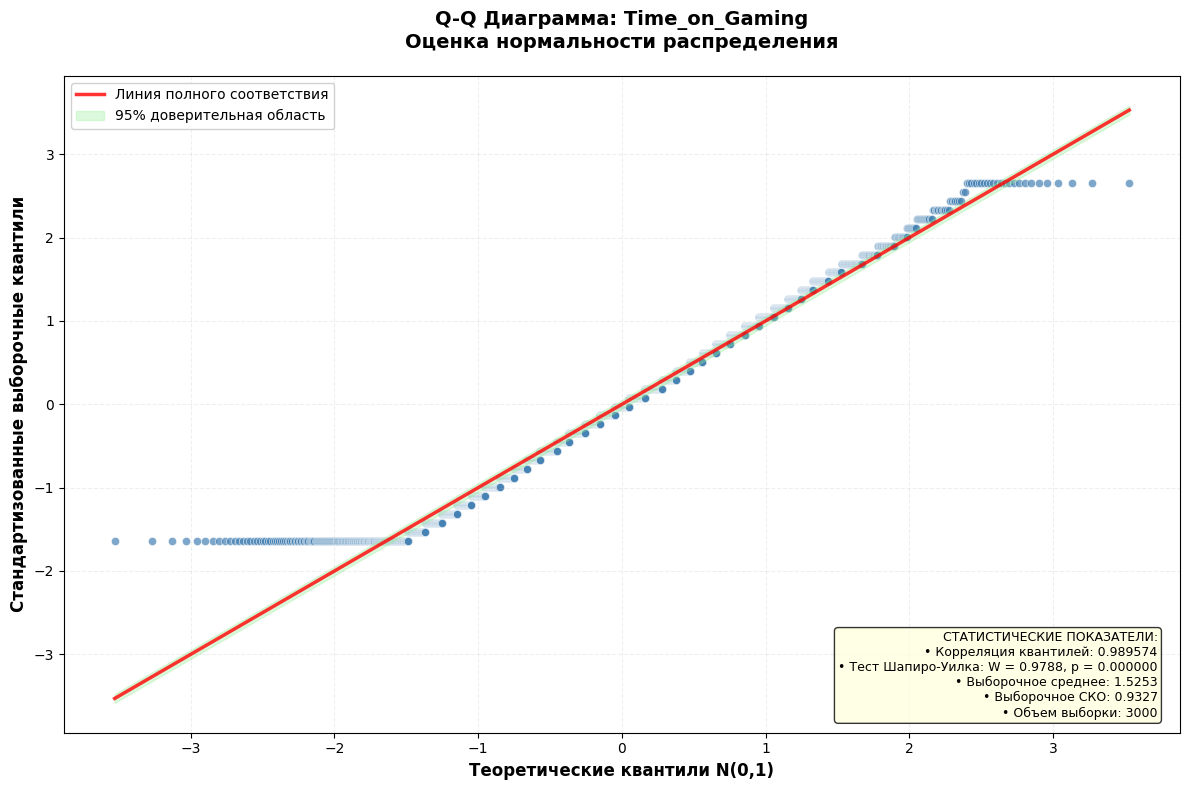


📈 КОРРЕЛЯЦИЯ КВАНТИЛЕЙ: 0.989574

🎯 ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:
✅ Распределение очень хорошо соответствует нормальному
   • Незначительные систематические отклонения
   • Пригодно для параметрических тестов

📋 ТЕСТ ШАПИРО-УИЛКА: p = 0.000000
❌ Тест Шапиро-Уилка отвергает нормальность (p ≤ 0.05)


In [13]:
qq = visualize_quantile_comparison(df[col])

## Анализ формы распределения

### Асимметрия и эксцесс
- **Коэффициент асимметрии**: +0,259 (незначительная правосторонняя асимметрия)
- **Коэффициент эксцесса**: -0,498 (близок к нормальному, слегка плосковершинное)

### Проверка нормальности распределения

#### 1. Критерий хи-квадрат (χ²)
- **Статистика χ²**: 453,230
- **Степени свободы**: 9
- **Критическое значение**: 16,919
- **P-значение**: < 0,001
- **Заключение**: ❌ **Распределение НЕ соответствует нормальному закону**

#### 2. Анализ асимметрии и эксцесса
- **Z-статистика асимметрии**: +5,795 (критическое значение: ±1,96)
- **Z-статистика эксцесса**: -5,575 (критическое значение: ±1,96)
- **P-значения**: < 0,001 для обеих статистик
- **Заключение**: ❌ **Распределение отклоняется от нормального**

#### 3. Q-Q анализ
- **Корреляция квантилей**: 0,9896
- **Тест Шапиро-Уилка**: p < 0,001
- **Заключение**: ✅ **Очень хорошее соответствие нормальному** (по корреляции), но ❌ **отвергается тестом Шапиро-Уилка**

### Итоговый вывод по нормальности:
Распределение `Time_on_Gaming` **НЕ является нормальным**. Несмотря на высокую корреляцию квантилей (0,9896), все статистические тесты отвергают гипотезу о нормальности распределения. Основные отклонения:

1. **Правосторонняя асимметрия**: больше значений сконцентрировано в левой части распределения
2. **Плосковершинность**: распределение более плоское по сравнению с нормальным
3. **Избыток нулевых значений**: мода равна 0, что нетипично для нормального распределения


# Bring the data to a normal distribution

Усечение выбросов
Статистики:

        Среднее: 1.51
        Дисперсия: 0.79
        Мода: 0.00
        Медиана: 1.50
        Квантиль 0.25: 0.80
        Квантиль 0.5: 1.50
        Квантиль 0.75: 2.20
        Эксцесс: -0.89
        Ассиметрия: 0.06
        IQR: 1.40

    
Удаление выбросов
Статистики:

        Среднее: 1.43
        Дисперсия: 0.70
        Мода: 0.00
        Медиана: 1.40
        Квантиль 0.25: 0.80
        Квантиль 0.5: 1.40
        Квантиль 0.75: 2.10
        Эксцесс: -0.86
        Ассиметрия: 0.01
        IQR: 1.30

    


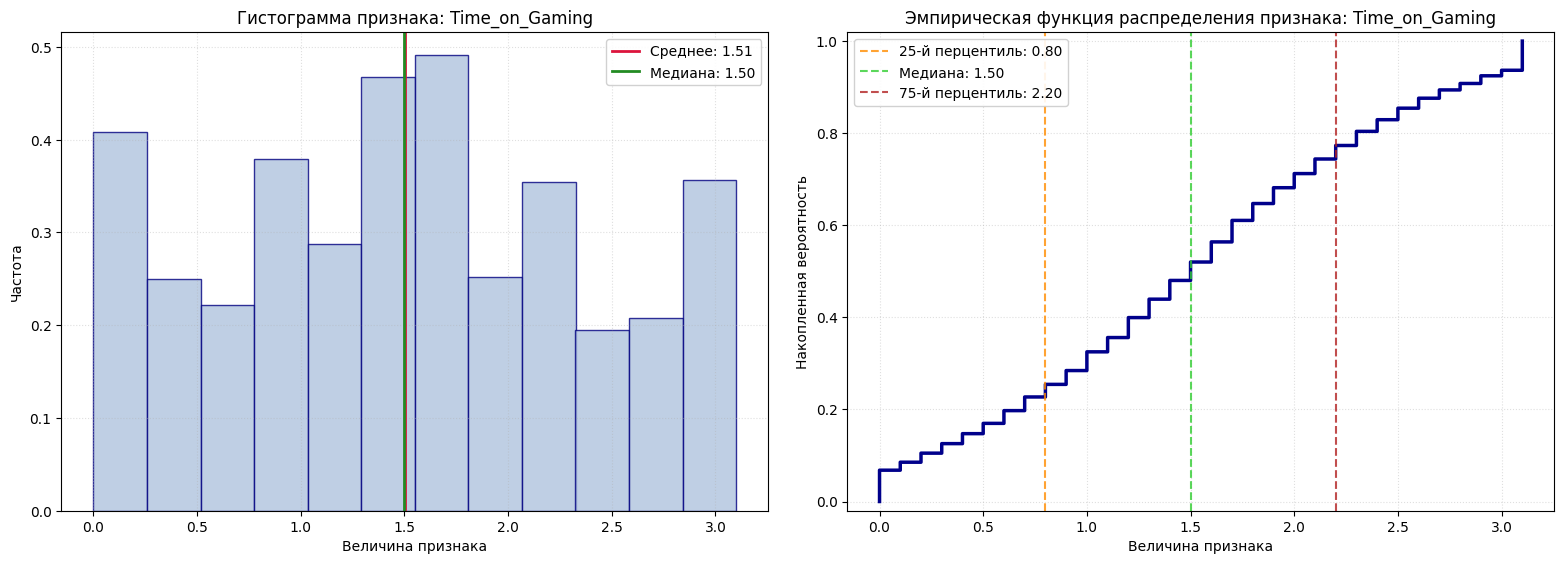

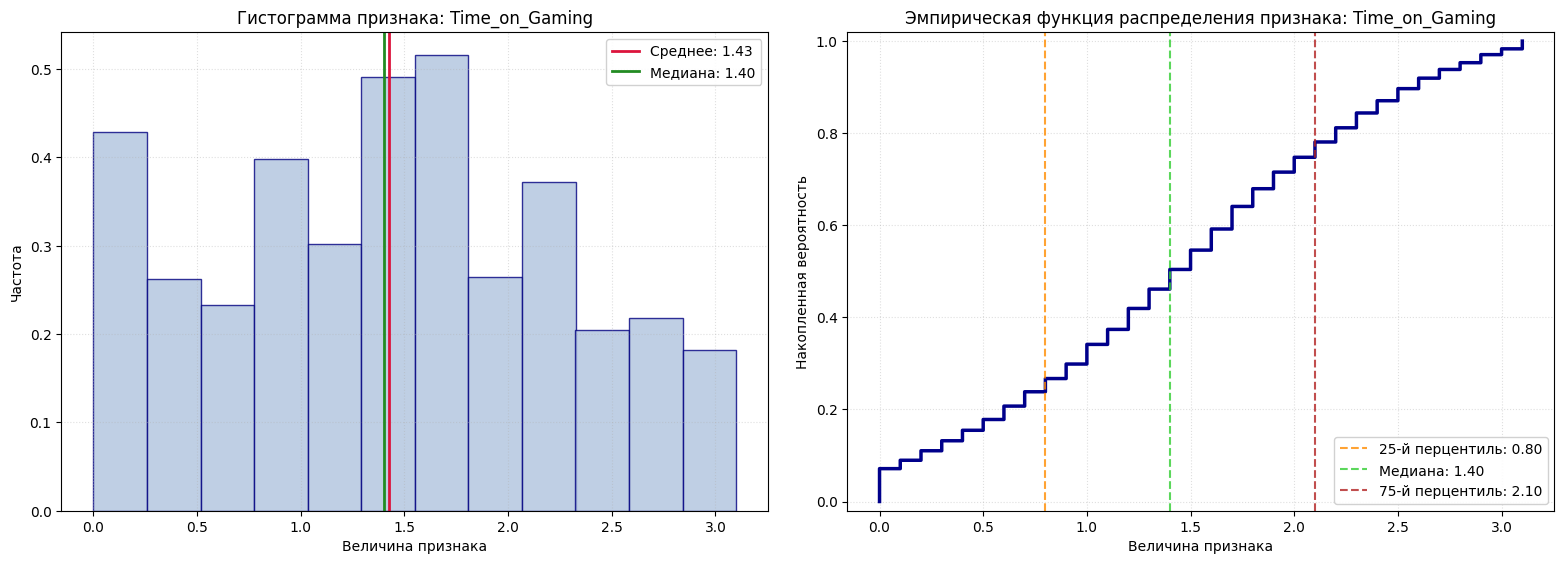

In [23]:
# outliers clip
col_outliers_clip = df[col]
lower_bound = col_outliers_clip.quantile(0.05)
upper_bound = col_outliers_clip.quantile(0.95)
col_outliers_clip = col_outliers_clip.clip(lower=lower_bound, upper=upper_bound)

print('Усечение выбросов')
get_stats(col_outliers_clip)

# outliers remove
col_outliers_remove = df[col]
col_outliers_remove = col_outliers_remove[(col_outliers_remove >= lower_bound) & (col_outliers_remove <= upper_bound)]

print('Удаление выбросов')
get_stats(col_outliers_remove)

Стандартизация
Статистики:

        Среднее: 0.00
        Дисперсия: 1.00
        Мода: -1.64
        Медиана: -0.03
        Квантиль 0.25: -0.78
        Квантиль 0.5: -0.03
        Квантиль 0.75: 0.72
        Эксцесс: -0.50
        Ассиметрия: 0.26
        IQR: 1.50

    
Нормализация
Статистики:

        Среднее: 0.00
        Дисперсия: 0.00
        Мода: 0.00
        Медиана: 0.00
        Квантиль 0.25: 0.00
        Квантиль 0.5: 0.00
        Квантиль 0.75: 0.00
        Эксцесс: -0.50
        Ассиметрия: 0.26
        IQR: 0.00

    


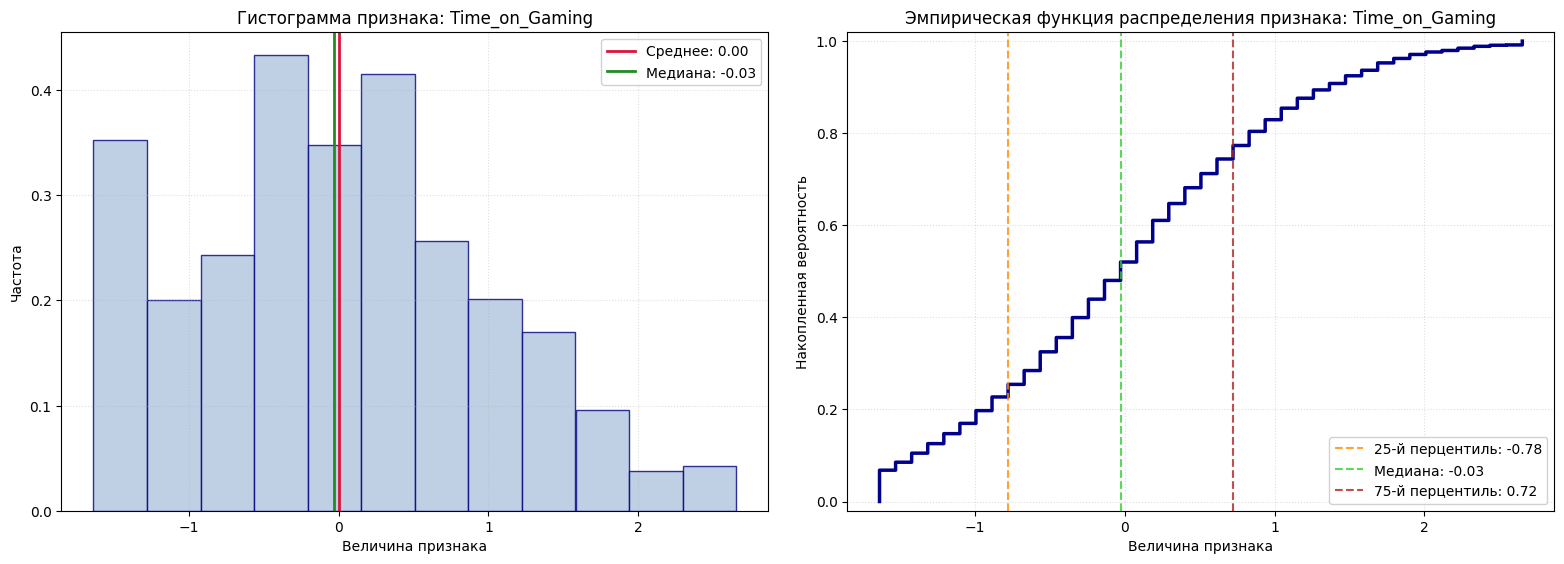

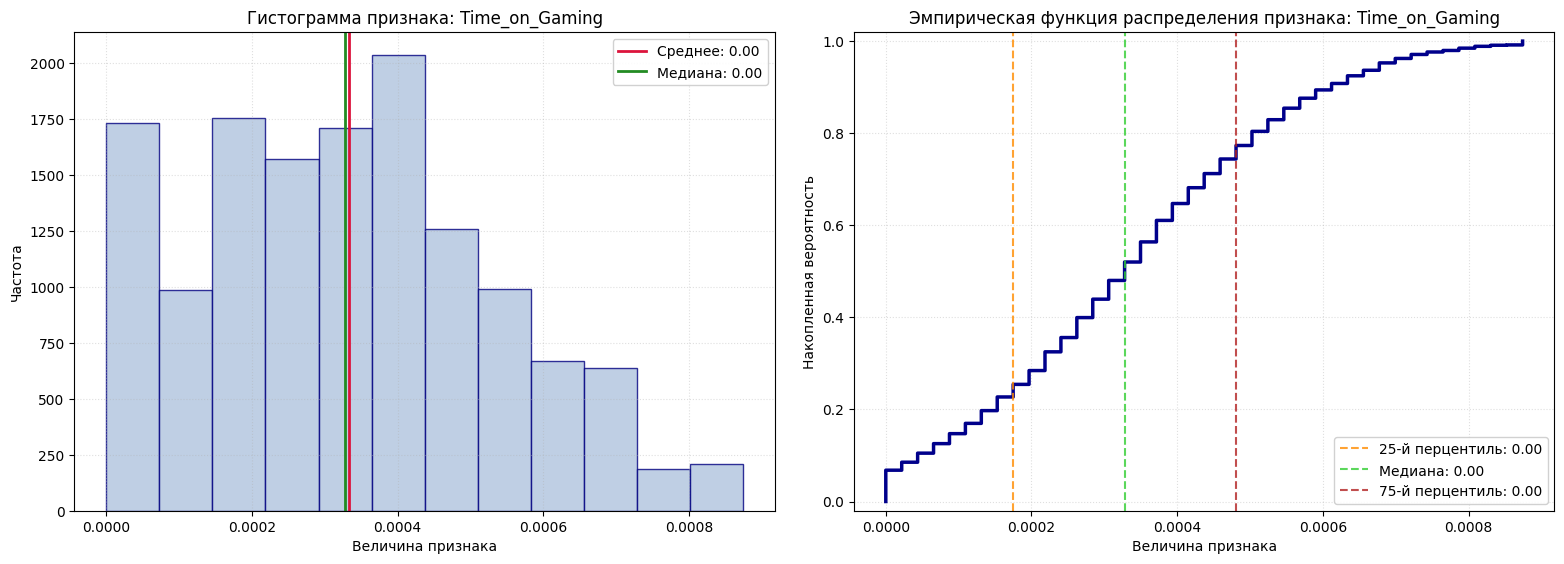

In [26]:
#standartisation
col_stand = (df[col] - df[col].mean()) / df[col].std()
print('Стандартизация')
get_stats(col_stand)

# normalize
col_norm = df[col] / df[col].sum()
print('Нормализация')
get_stats(col_norm)

Логарифмирование
Статистики:

        Среднее: 0.85
        Дисперсия: 0.16
        Мода: 0.00
        Медиана: 0.92
        Квантиль 0.25: 0.59
        Квантиль 0.5: 0.92
        Квантиль 0.75: 1.16
        Эксцесс: -0.45
        Ассиметрия: -0.53
        IQR: 0.58

    
Взятие корня
Статистики:

        Среднее: 1.14
        Дисперсия: 0.22
        Мода: 0.00
        Медиана: 1.22
        Квантиль 0.25: 0.89
        Квантиль 0.5: 1.22
        Квантиль 0.75: 1.48
        Эксцесс: 0.33
        Ассиметрия: -0.83
        IQR: 0.59

    


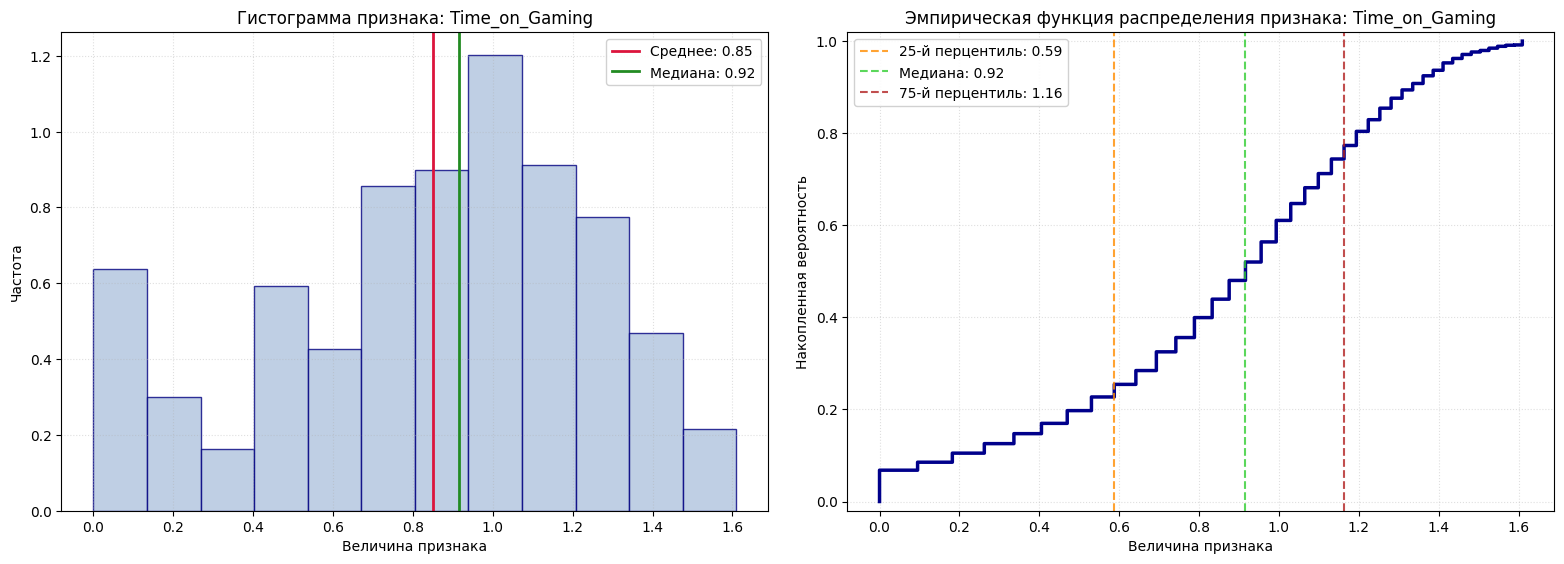

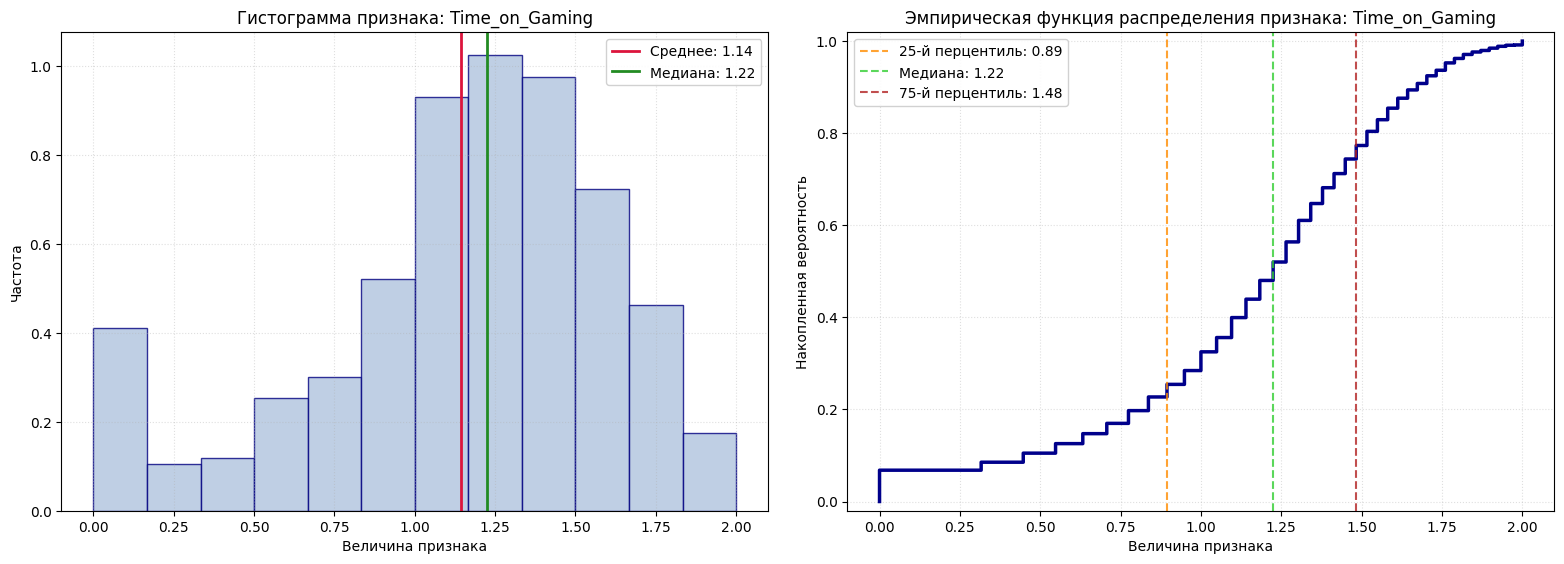

In [29]:
# логарифмирование
col_log = np.log1p(df[col])
print('Логарифмирование')
get_stats(col_log)

# sqrt
col_sqrt = np.sqrt(df[col])
print('Взятие корня')
get_stats(col_sqrt)

Распределение признака, скорее всего, не является детерминированным функциональным преобразованием нормального распределения. Возможно, оно является композицией многих преобразований, но существует практически бесконечное число комбинаций преобразований, что делает поиск подходящей невозможным.
В общем и целом, нет гарантий, что распределение признака в целом можно привести к нормальному.

## Попытки нормализации данных

### 1. Обработка выбросов

#### Усечение выбросов (5-95 перцентили):
- **Среднее**: 1,51 → незначительное изменение
- **Асимметрия**: 0,26 → 0,06 (улучшение!)
- **Эксцесс**: -0,50 → -0,89 (ухудшение)
- **Вывод**: Усечение выбросов заметно улучшило симметричность

#### Удаление выбросов:
- **Среднее**: 1,43 (снижение)
- **Асимметрия**: 0,26 → 0,01 (почти идеальная симметрия!)
- **Эксцесс**: -0,50 → -0,86 (ухудшение плосковершинности)
- **Вывод**: Удаление выбросов практически устранило асимметрию

### 2. Математические преобразования

#### Стандартизация:
- **Среднее**: 0,00 (по определению)
- **Дисперсия**: 1,00 (по определению)
- **Асимметрия**: 0,26 (без изменений)
- **Эксцесс**: -0,50 (без изменений)
- **Вывод**: Форма распределения не изменилась

#### Нормализация (деление на сумму):
- Все значения близки к нулю
- **Вывод**: Неэффективное преобразование для данного типа данных

#### Логарифмирование (log1p):
- **Среднее**: 0,85
- **Асимметрия**: +0,26 → -0,53 (изменение знака!)
- **Эксцесс**: -0,50 → -0,45 (незначительное улучшение)
- **Вывод**: Логарифмирование изменило правостороннюю асимметрию на левостороннюю

#### Извлечение квадратного корня:
- **Среднее**: 1,14
- **Асимметрия**: +0,26 → -0,83 (сильная левосторонняя асимметрия)
- **Эксцесс**: -0,50 → 0,33 (приближение к нормальному)
- **Вывод**: Преобразование слишком радикально изменило форму

### Заключение по нормализации:
**Ни одно из преобразований не привело данные к нормальному распределению.** Лучшие результаты показало **удаление выбросов**, которое практически устранило асимметрию (0,01), но усилило плосковершинность. Это подтверждает вывод о том, что данные имеют сложную структуру, не сводимую к простым функциональным преобразованиям нормального распределения.


# Group by School_Grade

In [36]:
def analyze_groups_by_grade(df, value_column, grade_column='School_Grade'):
    
    # Группировка данных
    grouped = df.groupby(grade_column)[value_column]
    
    # Создание графика
    plt.figure(figsize=(12, 8))
    
    # Получаем уникальные классы и цвета для каждого
    grades = sorted(df[grade_column].unique())
    colors = plt.cm.Set3(np.linspace(0, 1, len(grades)))
    
    # Построение гистограмм для каждой группы
    for i, (grade, color) in enumerate(zip(grades, colors)):
        group_data = grouped.get_group(grade).dropna()
        
        # Гистограмма
        plt.hist(group_data, alpha=0.7, color=color, label=f'{grade} класс', 
                bins=15, density=True, edgecolor='black', linewidth=0.5)
    
    plt.xlabel(value_column, fontsize=12, fontweight='bold')
    plt.ylabel('Плотность вероятности', fontsize=12, fontweight='bold')
    plt.title(f'Распределение {value_column} по классам школы', 
             fontsize=14, fontweight='bold', pad=20)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Расчет статистики
    stats_results = {}
    
    print("📊 СТАТИСТИКА ПО КЛАССАМ:")
    print("=" * 50)
    
    for grade in grades:
        group_data = grouped.get_group(grade).dropna()
        
        mean_val = group_data.mean()
        variance_val = group_data.var()
        std_val = group_data.std()
        count_val = len(group_data)
        
        stats_results[grade] = {
            'mean': mean_val,
            'variance': variance_val,
            'std': std_val,
            'count': count_val
        }
        
        print(f"🎓 {grade} класс:")
        print(f"   • Количество учеников: {count_val}")
        print(f"   • Среднее значение: {mean_val:.2f}")
        print(f"   • Дисперсия: {variance_val:.2f}")
        print(f"   • Стандартное отклонение: {std_val:.2f}")
        print(f"   • Коэффициент вариации: {(std_val/mean_val*100):.1f}%")
        print("-" * 30)
    



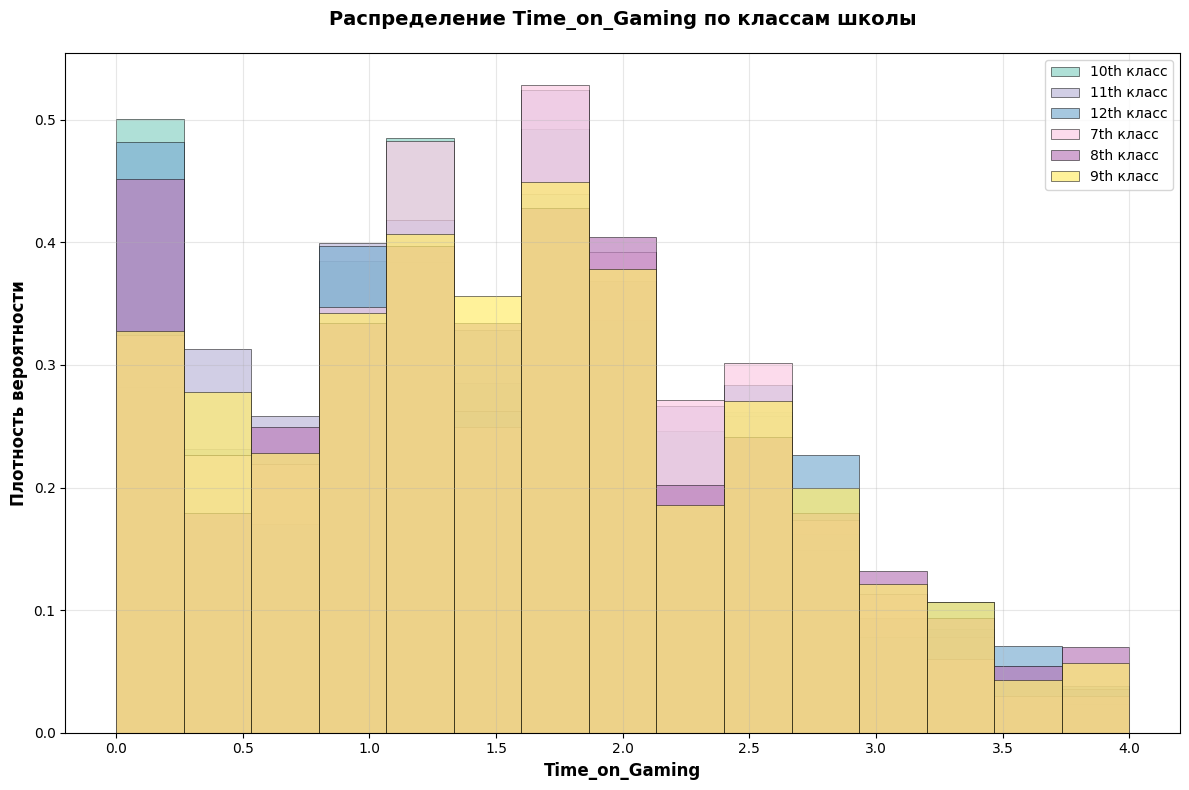

📊 СТАТИСТИКА ПО КЛАССАМ:
🎓 10th класс:
   • Количество учеников: 487
   • Среднее значение: 1.45
   • Дисперсия: 0.86
   • Стандартное отклонение: 0.93
   • Коэффициент вариации: 63.9%
------------------------------
🎓 11th класс:
   • Количество учеников: 479
   • Среднее значение: 1.51
   • Дисперсия: 0.79
   • Стандартное отклонение: 0.89
   • Коэффициент вариации: 58.7%
------------------------------
🎓 12th класс:
   • Количество учеников: 529
   • Среднее значение: 1.52
   • Дисперсия: 0.94
   • Стандартное отклонение: 0.97
   • Коэффициент вариации: 63.9%
------------------------------
🎓 7th класс:
   • Количество учеников: 497
   • Среднее значение: 1.55
   • Дисперсия: 0.78
   • Стандартное отклонение: 0.88
   • Коэффициент вариации: 56.7%
------------------------------
🎓 8th класс:
   • Количество учеников: 482
   • Среднее значение: 1.54
   • Дисперсия: 0.96
   • Стандартное отклонение: 0.98
   • Коэффициент вариации: 63.8%
------------------------------
🎓 9th класс:
   • Коли

In [37]:
analyze_groups_by_grade(df, col)

## Анализ по классам школы

### Распределение времени игр по возрастным группам:

| Класс | Кол-во учеников | Среднее время (ч) | Ст. отклонение | Коэф. вариации |
|-------|-----------------|-------------------|----------------|----------------|
| 7-й   | 497             | 1,55              | 0,88           | 56,7%          |
| 8-й   | 482             | 1,54              | 0,98           | 63,8%          |
| 9-й   | 526             | 1,57              | 0,94           | 59,8%          |
| 10-й  | 487             | 1,45              | 0,93           | 63,9%          |
| 11-й  | 479             | 1,51              | 0,89           | 58,7%          |
| 12-й  | 529             | 1,52              | 0,97           | 63,9%          |

### Ключевые закономерности:

#### 1. Возрастная динамика игрового времени:
- **Младшие классы (7-9)**: Среднее время ~1,55 часа (пик в 9-м классе)
- **Старшие классы (10-12)**: Среднее время ~1,49 часа (снижение)
- **Тенденция**: Небольшое снижение игрового времени в старших классах

#### 2. Изменчивость по возрастам:
- **Наименьшая вариация**: 7-й класс (56,7%) - более однородное поведение
- **Наибольшая вариация**: 8-й, 10-й, 12-й классы (~64%) - больший разброс
- **Стабильность**: 11-й класс показывает относительную стабильность (58,7%)

#### 3. Статистические наблюдения:
- **Максимум**: 9-й класс (1,57 ч) - период наибольшего увлечения играми
- **Минимум**: 10-й класс (1,45 ч) - возможно, связано с подготовкой к экзаменам
- **Разброс между классами**: 0,12 часа (относительно небольшой)

### Интерпретация результатов:

1. **Подростковый пик**: Максимальное время игр приходится на 9-й класс, что соответствует возрасту 14-15 лет - периоду наибольшей активности в играх.

2. **Академическое давление**: Снижение в 10-м классе может быть связано с переходом в старшую школу и повышенной учебной нагрузкой.

3. **Относительная стабильность**: Различия между классами невелики (коэффициент вариации между классами < 4%), что говорит о том, что игровые привычки формируются рано и остаются относительно стабильными.
